# Project on Avocado dataset

# Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression

In this project we are performing the regression on the dataset 
Output variable :- AveragePrice


# Importing required libraries

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Dataset

In [64]:
data=pd.read_csv("avocado.csv")
data.head()

,sl,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Familiarisation with the Dataset

In [65]:
data.shape

(1517, 14)

In [66]:
data.drop(['sl','Date','year'],axis=1 ,inplace=True)

In [67]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


# Null/Missing Value Analysis
Checking the null/missing value is the first and required step in the EDA analyis. Finding Null/Missing value and handling them contributes in the better performance of the model.

In [68]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

We cannot find any Null/Missing values in this data

>Fetching data count as per region

In [69]:
print(data.region.value_counts())

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

>Encoding the non numeric column into numeric 

In [70]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['type','region']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [71]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,7


# DATA VISUALISATION USING VARIOUS PLOTS

# 1.Plotting countplot of the data as per region 


---CountsPlots for Region---



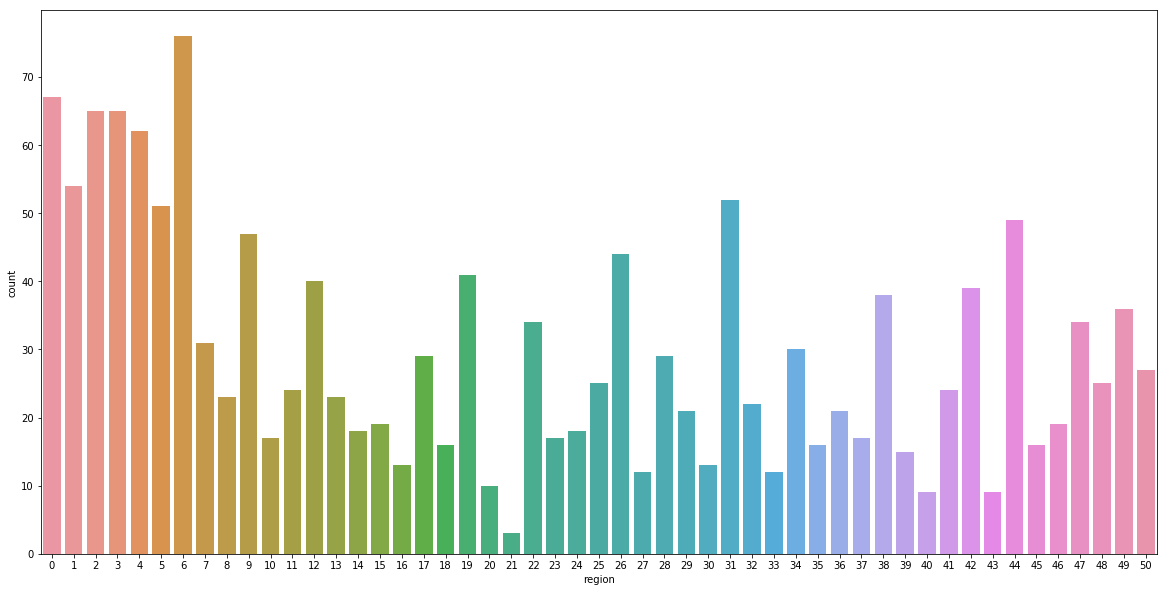

In [72]:
print('\n---CountsPlots for Region---\n')
plt.figure(figsize=(20,10))
sns.countplot(data['region'])


California has highest number of data count

# 2.BoxPlot

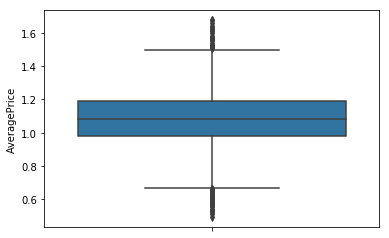

In [73]:
sns.boxplot(y='AveragePrice',data=data)


# 3.Distribution plot.

This plot will display the distribution of the features and will let us know skewness of the dependent variables

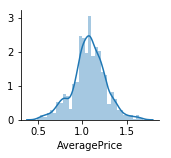

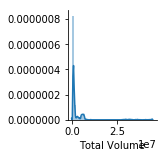

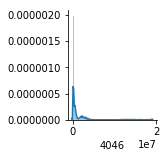

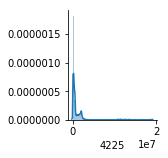

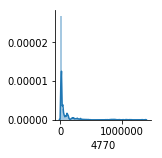

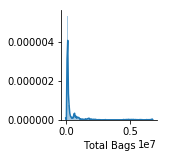

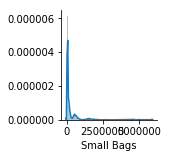

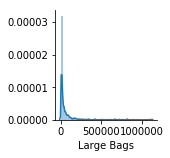

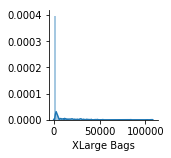

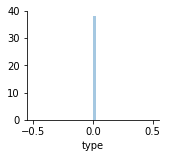

In [74]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
#Plotting Probablity Density Function Curve for the age : -
    sns.FacetGrid(data,size=2.3)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

# 4.LinePlots

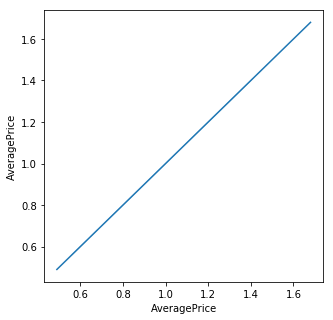

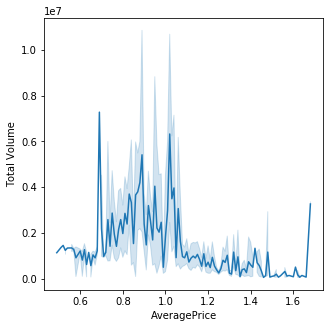

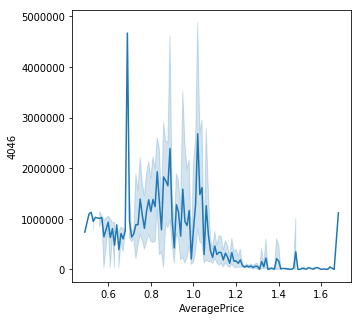

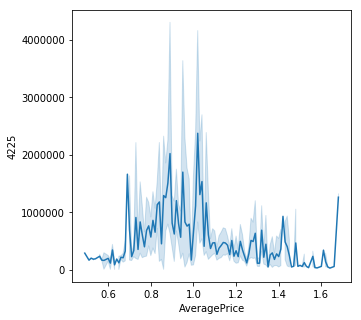

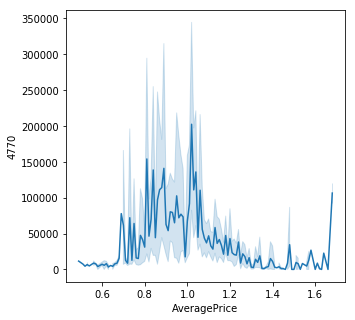

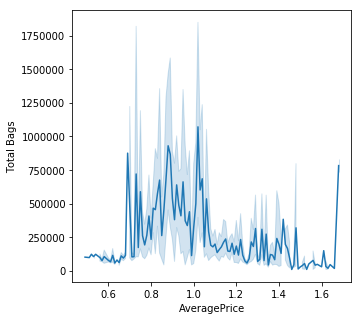

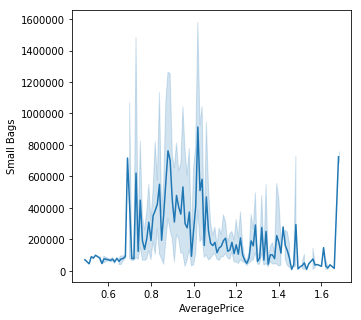

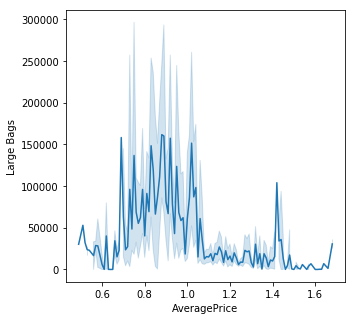

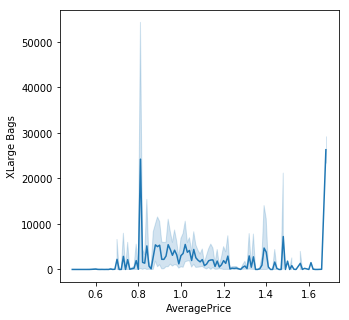

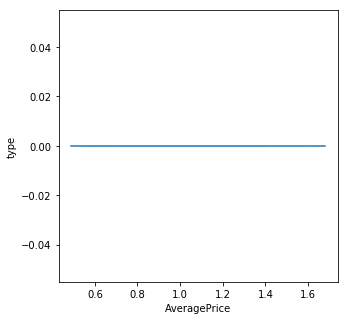

In [75]:
column=list(data.columns[:-1])
for val in column:
    plt.figure(figsize=(5,5))
    sns.lineplot(x='AveragePrice',y=val, data=data)
    plt.show()

# 5.Regression Plots

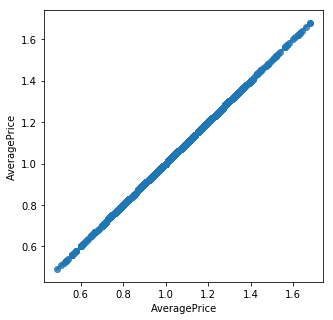

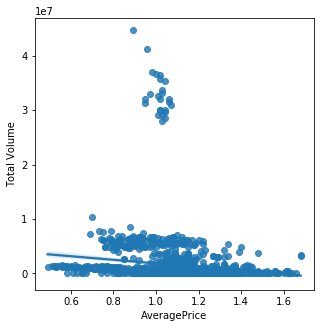

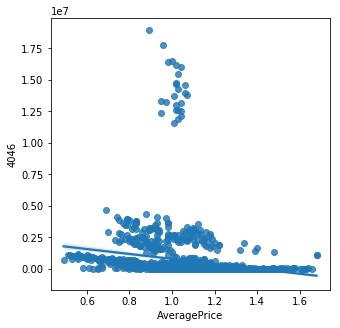

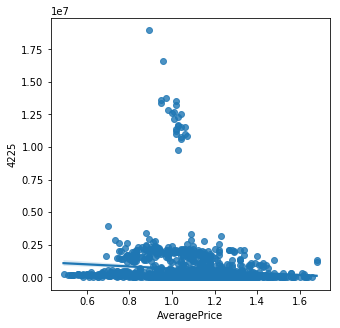

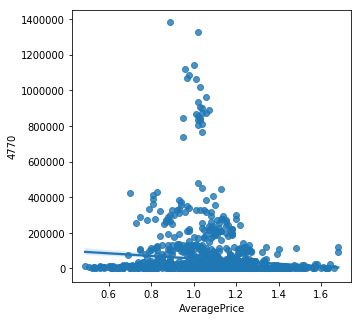

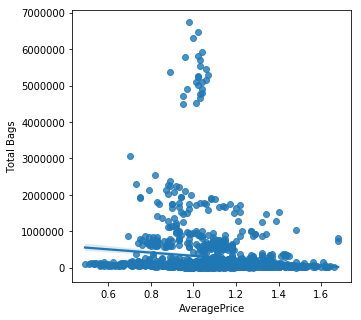

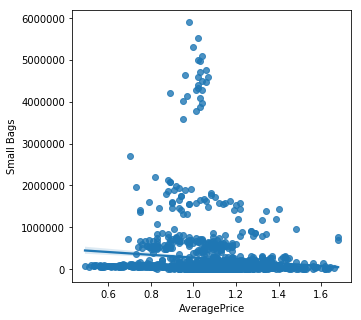

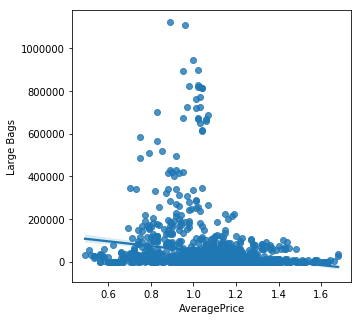

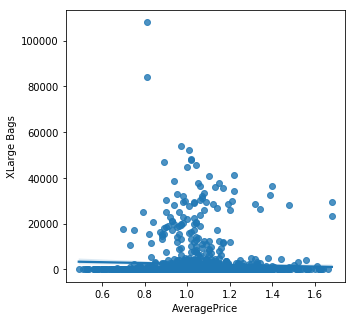

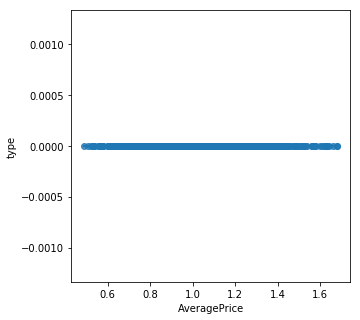

In [76]:
column=list(data.columns[:-1])
for val in column:
    plt.figure(figsize=(5,5))
    sns.regplot(x='AveragePrice',y=val, data=data)
    plt.show()

# 6.PairPlots

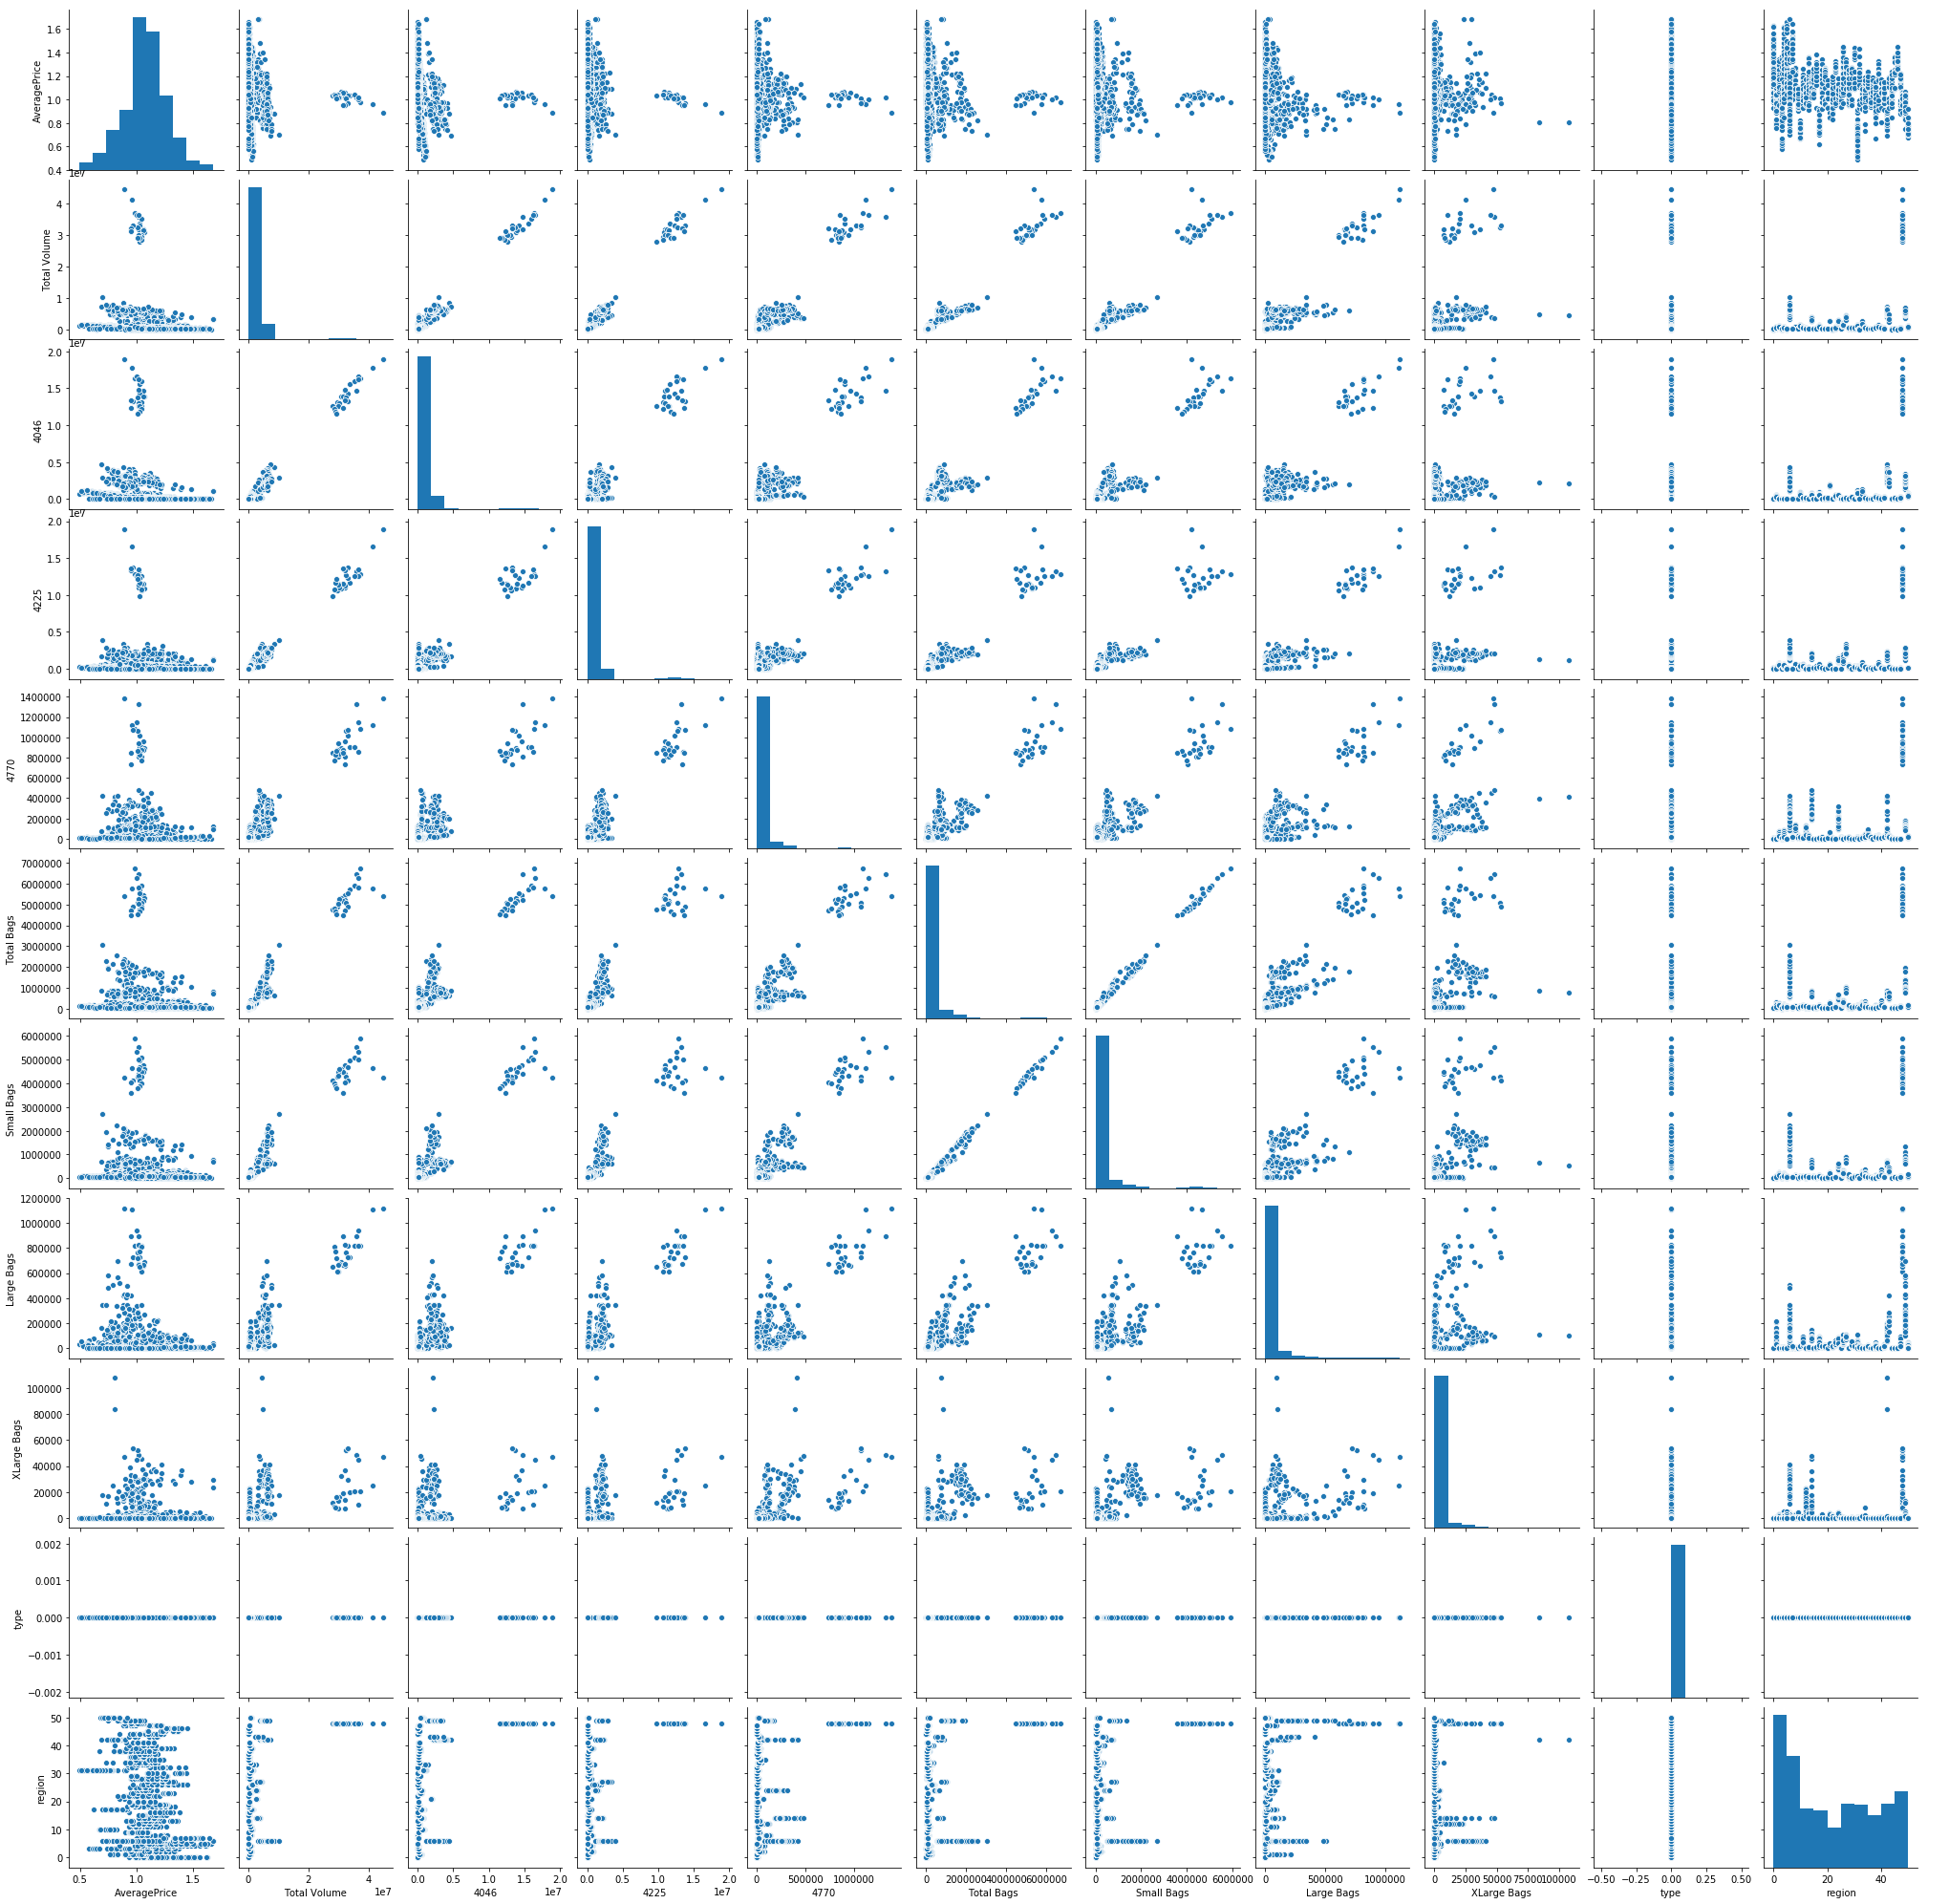

In [18]:
sns.pairplot(data)

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

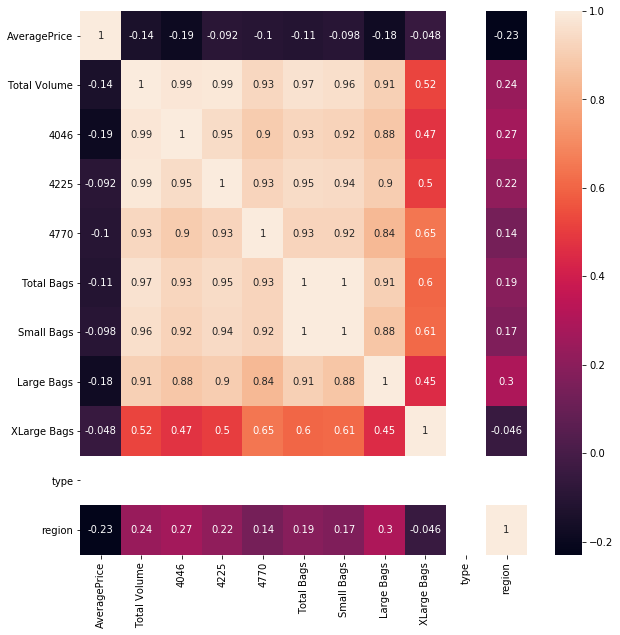

In [19]:
df_cor=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.9. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [20]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

From analysing the correlation matrix we can remove the highly dependent features , after removing the features which are correlated with greater >0.9 value we ended up getting 5 features which will be further taken for the our analysis.

In [21]:
data.shape

(1517, 5)

# Skewness 

In [22]:
data.skew()

AveragePrice   -0.109444
Total Volume    6.200138
XLarge Bags     5.775077
type            0.000000
region          0.288146
dtype: float64

Handling the skewness by stanadardisation the data

In [23]:
data.drop(['type'],axis=1,inplace=True)

# Handling outliers and Standardisation of the data

In [24]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[1.35048079, 0.34696593, 0.29272731, 1.3143384 ],
       [1.45639674, 0.34907791, 0.29272731, 1.3143384 ],
       [0.76783831, 0.33478463, 0.29272731, 1.3143384 ],
       ...,
       [2.14485045, 0.32120275, 0.1820374 , 0.88028586],
       [2.09189247, 0.31878364, 0.29272731, 0.88028586],
       [1.88006056, 0.3201721 , 0.29272731, 0.88028586]])

In [25]:
df=data[(zs<3).all(axis=1)]

In [26]:
df.shape

(1451, 4)

In [27]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (1517, 4)
shape of the data without  outliers   (1451, 4)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and has been removed.

Hence the new shape of the dataset after outliers removal is(1451, 4) . Now this will be our finalised Dataset for modelling.

# Separating the input and output variables

In [28]:
y=df['AveragePrice']
x=df.drop(['AveragePrice'],axis=1)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# Applying Various Regression Models
In this section we will be applying several regressor models and hence we will be checking following performance matrix :

1) R2 score

2) Root mean sqaure Error 

3) Mean of crossing validation score using R2 as scoring

4) Std Deviation of crossing validation score using R2 as scoring

We have also used GridSearch for tuning the parameters

In [30]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function for R2 Score
This function is built to find the best r2 score depending on the random state while splitting the model. This function prints the best r2 score and returns the random state for that R2 score

In [31]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score  is {} at random state {}' .format(max_r2_score,Final_r_state))
    return Final_r_state

# Function for RMSE
This function finds the rmse of the model using the random state at best r2 score.

In [32]:
def rmse(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
    return np.sqrt(mean_squared_error(test_y,pred))

Below function is created to make a list of rmse generated by different regressor , so that it can be compared at last, for the selection of the best model

In [33]:
rmse_list=[]
def list_rmse(RMSE):
    rmse_list.append(RMSE)
    return rmse_list

# 1.Linear Regression

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)
from sklearn.model_selection import cross_val_score
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())


The maximum r2 score  is 0.15418079426150844 at random state 65
mean cross_val_score -0.0602543722808951
std deviation of cross_val_score 0.1321946184272406


In [35]:
RMSE=rmse(lreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

RMSE 0.17497538567616633


# 2.KNeighborsRegressor

In [36]:
# The range of K is taken from -30 to 30 and used grid serach cv for hyperparameter tuning
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(-30,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_


{'n_neighbors': 29}

In [37]:
knr=KNeighborsRegressor(n_neighbors=29)
Final_r_state=max_r2_score(knr,x,y)
print('mean cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').std())


The maximum r2 score  is 0.6139164671874291 at random state 63
mean cross_val_score -0.47028390901197226
std deviation of cross_val_score 0.3073708836189307


In [38]:
RMSE=rmse(knr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

RMSE 0.11962990460433255


# 3. Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.01}

In [40]:
#Training the data on alpha =0.01 as it the best parameter given by grid search CV after tuning
lsreg=Lasso(alpha=0.01)
Final_r_state=max_r2_score(lsreg,x,y)
print('mean of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())


The maximum r2 score  is 0.14013272212964256 at random state 65
mean of cross_val_score -0.04445177683724118
std deviation of cross_val_score 0.10166109580976428


In [41]:
RMSE=rmse(lsreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

RMSE 0.17642247052846316


# 4.DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(10,40)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 11}

In [46]:
#Traing the data on max_depth(number of nodes) =11 as it the best parameter given by grid search CV after tuning
DT=DecisionTreeRegressor(max_depth=11)
Final_r_state=max_r2_score(DT,x,y)
print('mean of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').std())


The maximum r2 score  is 0.7075442210000213 at random state 76
mean of cross_val_score -0.8141162185150748
std deviation of cross_val_score 1.157869058439411


In [47]:
RMSE=rmse(DT,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

RMSE 0.09788796117122464


# Appying ensemble model for better results

# 1.GradientBoostingRegressor

In the Gradient Boosting regressor we will give learning_rate and n_estimators for the tuning which would be taken by Grid Serach CV for the operati

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [49]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=100)
Final_r_state=max_r2_score(gbr,x,y)
print('mean of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())


The maximum r2 score  is 0.08262050620278438 at random state 90
mean of cross_val_score -0.04201186910081502
std deviation of cross_val_score 0.0962021512887137


In [50]:
RMSE=rmse(gbr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

RMSE 0.1798468531292556


# 2.AdaBoostRegressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT,knr]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [52]:
ad=AdaBoostRegressor(learning_rate=0.001,n_estimators=10,base_estimator=lsreg)
Final_r_state=max_r2_score(ad,x,y)
print('mean of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').std())


The maximum r2 score  is 0.13943651002125335 at random state 65
mean of cross_val_score -0.048830633401372704
std deviation of cross_val_score 0.09612433912915543


In [53]:
RMSE=rmse(ad,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

RMSE 0.17604868876719734


In [54]:
print(List_rmse)

[0.17497538567616633, 0.11962990460433255, 0.17642247052846316, 0.09788796117122464, 0.1798468531292556, 0.17604868876719734]


In [55]:
model_list=['linear regression','KNR','LASSO','DTR','GBR','ADABOOST']

# Plotting Bargraph to Analyse the Performance Matrix

Text(0.5,1,'BarPlot between MSE and Models')

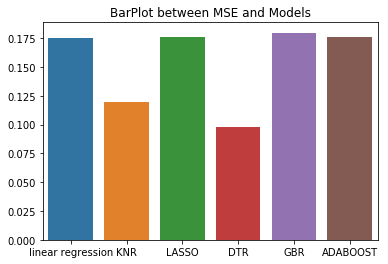

In [56]:
sns.barplot(x=model_list,y=List_rmse)
plt.title("BarPlot between MSE and Models")

After performing several regressor models on this data set and after analysing the performance matrix for all the models , it is concluded that DecisionTreeRegressor is giving the best results which are as follows :

The maximum r2 score  is 0.7075442210000213 at random state 76

mean of cross_val_score -0.8141162185150748

std deviation of cross_val_score 1.157869058439411

RMSE 0.09788796117122464

Therefore DecisionTreeRegressor is selected as our final model

>>Final Model -- DecisionTreeRegressor

In [58]:
DT=DecisionTreeRegressor(max_depth=11)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=76)
DT.fit(train_x,train_y)
pred = DT.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [59]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))
print('mean cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').std())

RMSE 0.10111727093411248
r2_score 0.704020529598981
mean cross_val_score -0.8138902273177011
std deviation of cross_val_score 1.1497114409646751


>Saving The Model

In [60]:
from sklearn.externals import joblib
joblib.dump(DT,"DT_REGRESSOR_Avacado.pkl")

['DT_REGRESSOR_Avacado.pkl']